In [34]:
# Handling files
import os
import zipfile
import json

# Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import choropleth, choropleth_mapbox

# Modelling
from sklearn.model_selection import train_test_split

## 1. Import and exploring data

In [35]:
## To be executed once:

# zip_dir = './data/emissions.csv.zip'
# extract_path = './data'
# with zipfile.ZipFile(zip_dir, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print(os.listdir(extract_path))

In [36]:
!rm -rf './data/emissions.csv.zip'

In [37]:
emissions = pd.read_csv('./data/emissions.csv', sep=',')
emissions.tail()

,year,state-name,sector-name,fuel-name,value
59896,2021,Wyoming,Commercial carbon dioxide emissions,Coal,0.012374
59897,2021,Wyoming,Residential carbon dioxide emissions,All Fuels,0.937989
59898,2021,Wyoming,Residential carbon dioxide emissions,Natural Gas,0.717777
59899,2021,Wyoming,Residential carbon dioxide emissions,Petroleum,0.220212
59900,2021,Wyoming,Total carbon dioxide emissions from all sectors,Petroleum,10.198574


In [38]:
print(emissions.size, emissions.shape)

299505 (59901, 5)


In [39]:
emissions.describe(exclude='object')['value']

count    59901.000000
mean        35.647050
std        207.883289
min          0.000022
25%          0.793179
50%          4.197628
75%         19.413459
max       5996.429314
Name: value, dtype: float64

In [40]:
emissions.dtypes

year             int64
state-name      object
sector-name     object
fuel-name       object
value          float64
dtype: object

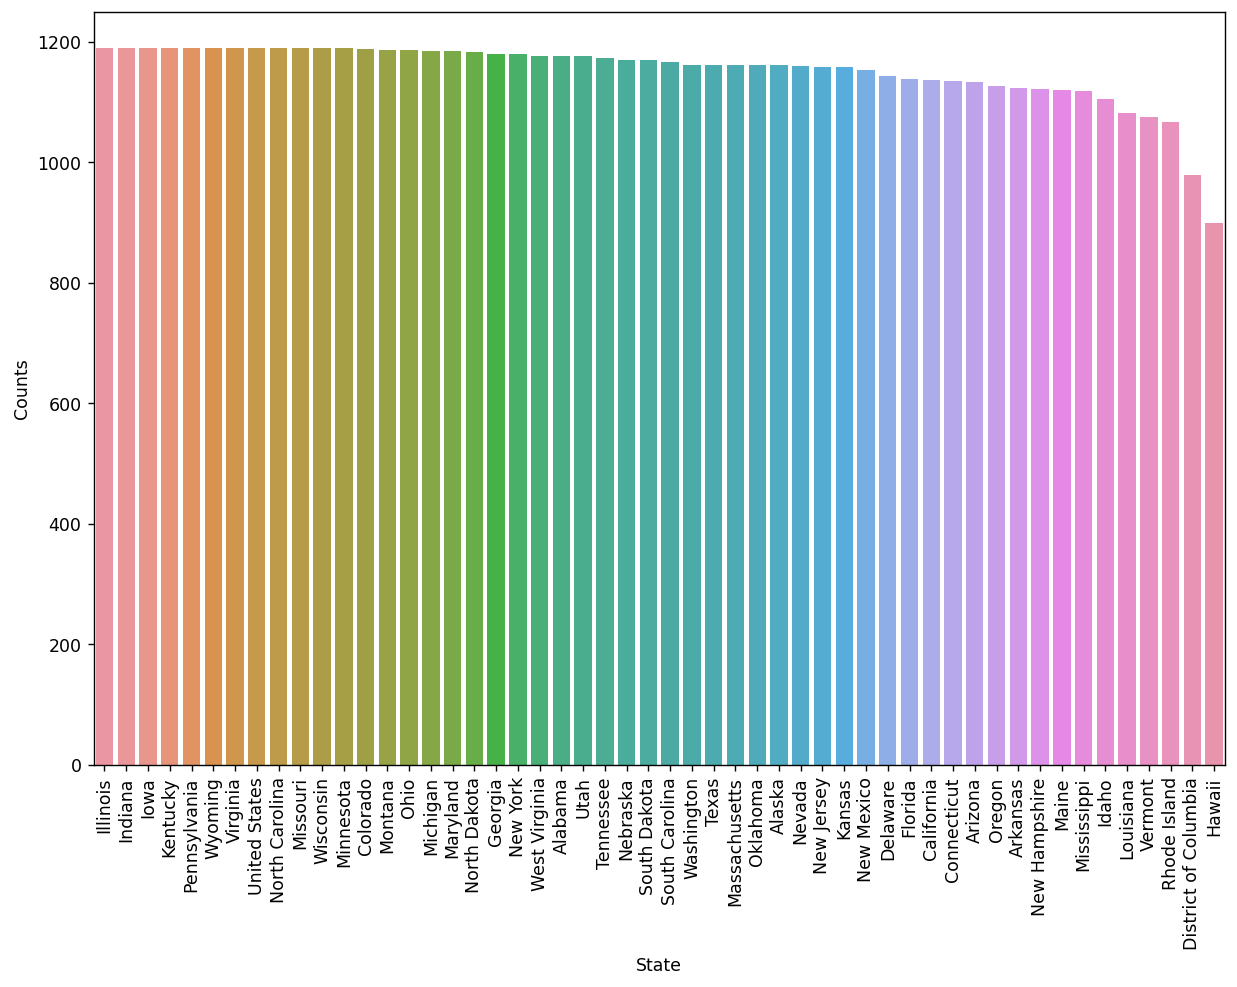

In [135]:
state_name = emissions['state-name'].value_counts().reset_index().rename(columns={'index' : 'State', 'state-name' : 'Counts'});

plt.figure(figsize=(10, 8), dpi=125)
sns.barplot(data=state_name, x='State', y='Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
emissions['sector-name'].value_counts()

Total carbon dioxide emissions from all sectors    10753
Industrial carbon dioxide emissions                10512
Electric Power carbon dioxide emissions            10298
Commercial carbon dioxide emissions                10180
Residential carbon dioxide emissions                9842
Transportation carbon dioxide emissions             8316
Name: sector-name, dtype: int64

In [43]:
emissions['fuel-name'].value_counts()

All Fuels      16214
Petroleum      16202
Natural Gas    15847
Coal           11638
Name: fuel-name, dtype: int64

In [44]:
emissions.isna().sum()

year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64

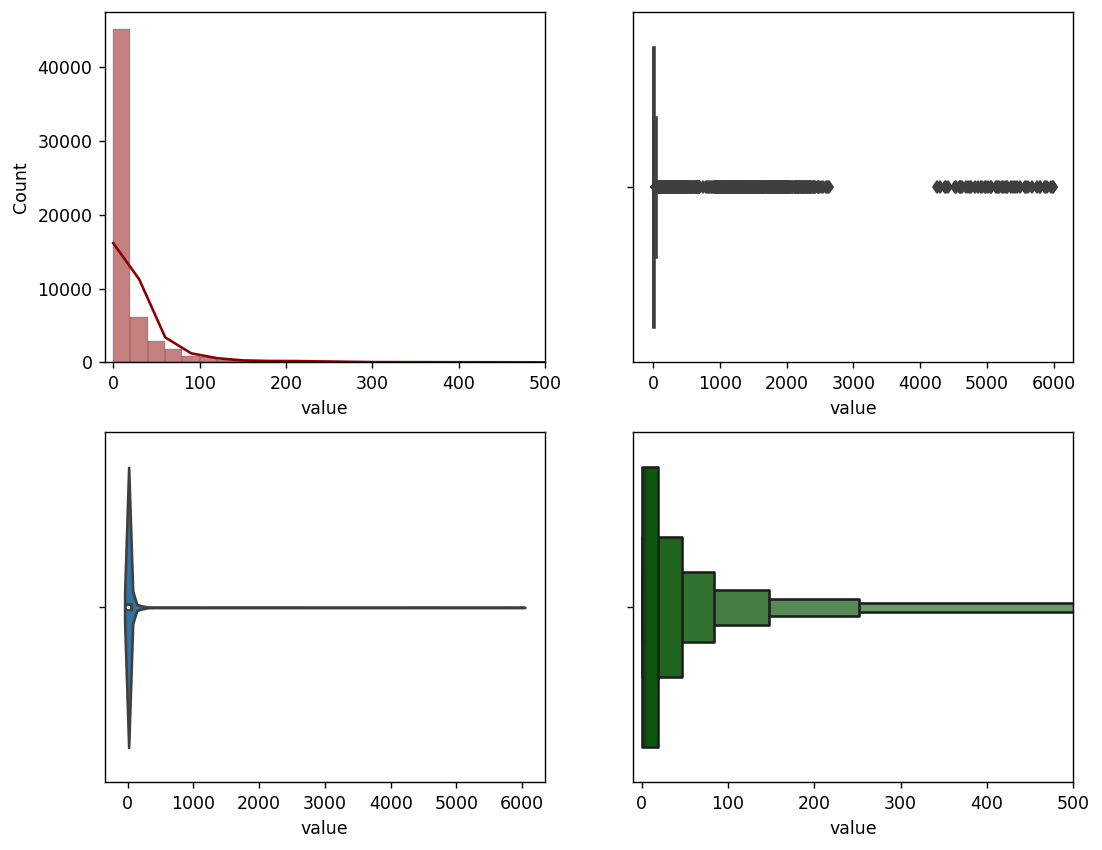

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=125)
sns.histplot(data=emissions, x='value', binwidth=20, ax=axes.flat[0], kde=True, color='darkred')
axes.flat[0].set_xlim(-10, 500)
sns.boxplot(data=emissions, x='value', showfliers=True, ax=axes.flat[1])
sns.violinplot(data=emissions, x='value', showfliers=True, ax=axes.flat[2])
sns.boxenplot(data=emissions, x='value', showfliers=False, ax=axes.flat[3], color='darkgreen')
axes.flat[3].set_xlim(-10, 500)
plt.show()

### 1.1 Subdividing value by `sector`

In [46]:
sector_values = emissions['sector-name'].value_counts().keys()
sector_data = {}
for i in range(len(sector_values)):
    sector = sector_values[i]
    sector_data[sector] = emissions[emissions['sector-name'] == sector_values[i]].loc[:, ['value']].values

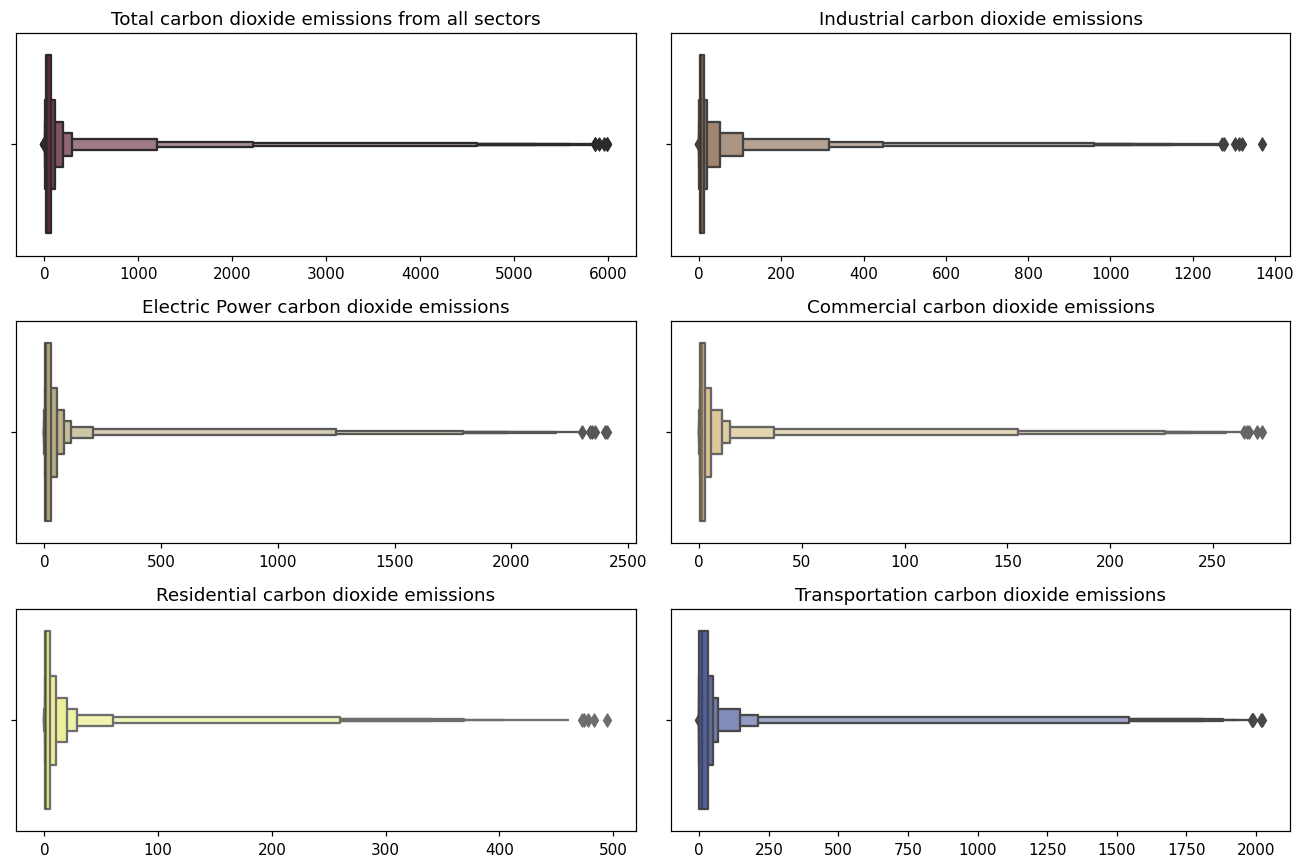

In [47]:
# By sector
all_sectors = sector_data['Total carbon dioxide emissions from all sectors']
industrial_co2 = sector_data['Industrial carbon dioxide emissions']
electric_power = sector_data['Electric Power carbon dioxide emissions']
commercial_co2 = sector_data['Commercial carbon dioxide emissions']
residential_co2 = sector_data['Residential carbon dioxide emissions']
transportation = sector_data['Transportation carbon dioxide emissions']

# Plot settings
par = True
sector_palette = ['#6D213C', '#946846', '#BAAB68', '#E3C16F', '#FAFF70', '#4357AD']

fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 8), dpi=110)
sns.boxenplot(x=all_sectors, showfliers=par, ax=axis.flat[0], color=sector_palette[0])
axis.flat[0].set_title('Total carbon dioxide emissions from all sectors')
sns.boxenplot(x=industrial_co2, showfliers=par, ax=axis.flat[1], color=sector_palette[1])
axis.flat[1].set_title('Industrial carbon dioxide emissions')
sns.boxenplot(x=electric_power, showfliers=par, ax=axis.flat[2], color=sector_palette[2])
axis.flat[2].set_title('Electric Power carbon dioxide emissions')
sns.boxenplot(x=commercial_co2, showfliers=par, ax=axis.flat[3], color=sector_palette[3])
axis.flat[3].set_title('Commercial carbon dioxide emissions')
sns.boxenplot(x=residential_co2, showfliers=par, ax=axis.flat[4], color=sector_palette[4])
axis.flat[4].set_title('Residential carbon dioxide emissions')
sns.boxenplot(x=transportation, showfliers=par, ax=axis.flat[5], color=sector_palette[5])
axis.flat[5].set_title('Transportation carbon dioxide emissions')
plt.tight_layout()
plt.show()

### 1.2 Subdividing value by `fuel`

In [48]:
fuel_names = emissions['fuel-name'].value_counts().keys()[1:]
fuel_data = {}
for i in range(len(fuel_names)):
    fuel = fuel_names[i]
    fuel_data[fuel] = emissions[emissions['fuel-name'] == fuel_names[i]].loc[:, ['value']].values

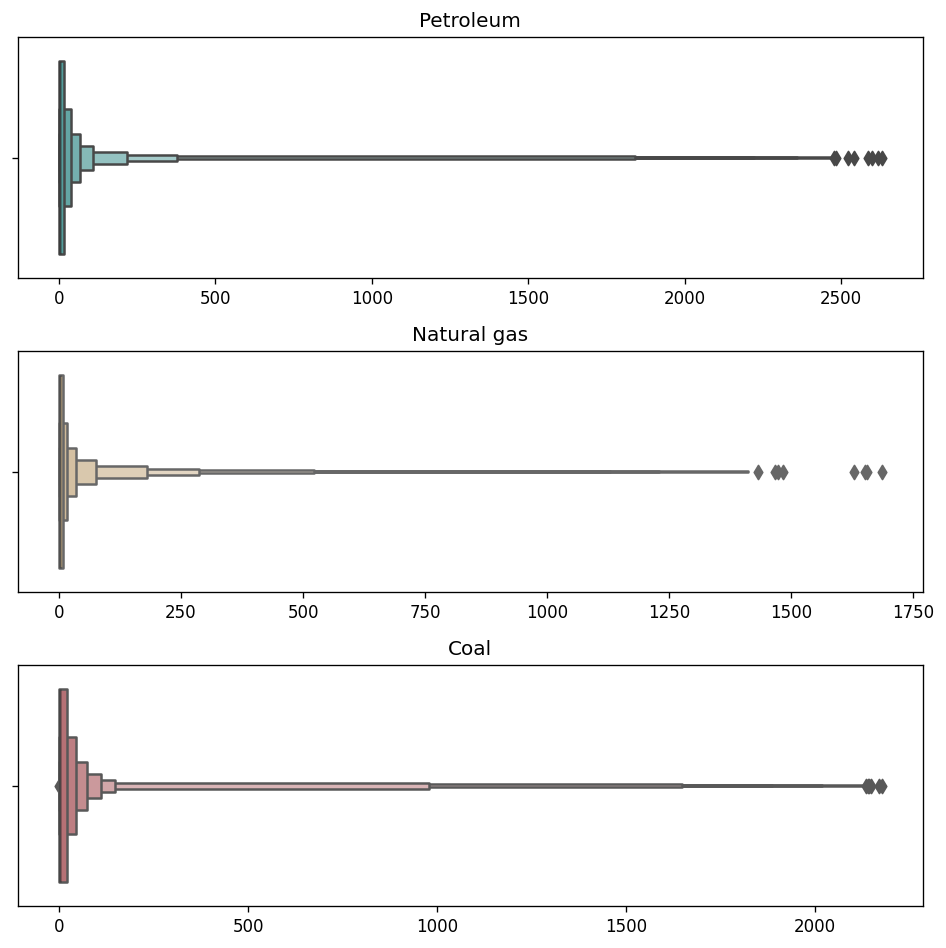

In [49]:
petroleum = fuel_data['Petroleum']
natural_gas = fuel_data['Natural Gas']
coal = fuel_data['Coal']

# Plot settings
fuel_palette = ['#48A9A6', '#D4B483', '#C1666B']
fig, axes = plt.subplots(3, 1, figsize=(8, 8), dpi=120)
sns.boxenplot(x=petroleum, showfliers=par, ax=axes.flat[0], color=fuel_palette[0])
axes.flat[0].set_title('Petroleum')
sns.boxenplot(x=natural_gas, showfliers=par, ax=axes.flat[1], color=fuel_palette[1])
axes.flat[1].set_title('Natural gas')
sns.boxenplot(x=coal, showfliers=par, ax=axes.flat[2], color=fuel_palette[2])
axes.flat[2].set_title('Coal')
plt.tight_layout()
plt.show()

In [50]:
emissions.groupby(
    by=['state-name', 'year'], 
    axis=0, 
    dropna=False).value_counts()

state-name  year  sector-name                              fuel-name    value    
Alabama     1970  Commercial carbon dioxide emissions      All Fuels    2.934710     1
                                                           Coal         0.128584     1
                                                           Natural Gas  1.981782     1
                                                           Petroleum    0.824345     1
                  Electric Power carbon dioxide emissions  All Fuels    37.344556    1
                                                                                    ..
Wyoming     2021  Commercial carbon dioxide emissions      Coal         0.012374     1
                                                           Natural Gas  0.686983     1
                                                           Petroleum    0.216315     1
                  Electric Power carbon dioxide emissions  All Fuels    34.082670    1
                                                

In [74]:
# Loading JSON from US states.
with open('./us_states.json', 'r') as us:   
    states = json.load(us)

states_json = []
for state in range(len(states['features'])):
    states_json.append(states['features'][state]['properties']['name'])

In [82]:
len(states_json), len(emissions['state-name'].value_counts().keys().tolist())

(52, 52)

In [114]:
pd.DataFrame(
    {
    "from_df" : emissions['state-name'].unique().tolist(),
    "from_json" : states_json
    }
).tail(10) # From Utah in json, values are not matching.

,from_df,from_json
42,Tennessee,Tennessee
43,Texas,Texas
44,United States,Utah
45,Utah,Vermont
46,Vermont,Virginia
47,Virginia,Washington
48,Washington,West Virginia
49,West Virginia,Wisconsin
50,Wisconsin,Wyoming
51,Wyoming,Puerto Rico
